In [1]:
sys.path.append("../../../StockStocker")
from stockstocker import Util 
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
filenames = [
    "^N225", "^GSPC", "^FTSE",
    "USDJPY", "EURUSD", "GBPUSD",
    "Japan_10", "United_States_10", "United_Kingdom_10",
    "CL=F"
]

In [3]:
df = {}
for filename in filenames:
    print(filename)
    filepath = Util.get_files(filename, daily=True)[0]
    df[filename] = pd.read_hdf(filepath)

^N225
^GSPC
^FTSE
USDJPY
EURUSD
GBPUSD
Japan_10
United_States_10
United_Kingdom_10
CL=F


In [5]:
data = pd.DataFrame(index=df["^N225"].index.unique())
for sym,d in df.items():
    data = data.join(d.Open.to_frame(sym))
data = data.reset_index().drop_duplicates(subset="Date").set_index("Date")

^N225
^GSPC
^FTSE
USDJPY
EURUSD
GBPUSD
Japan_10
United_States_10
United_Kingdom_10
CL=F


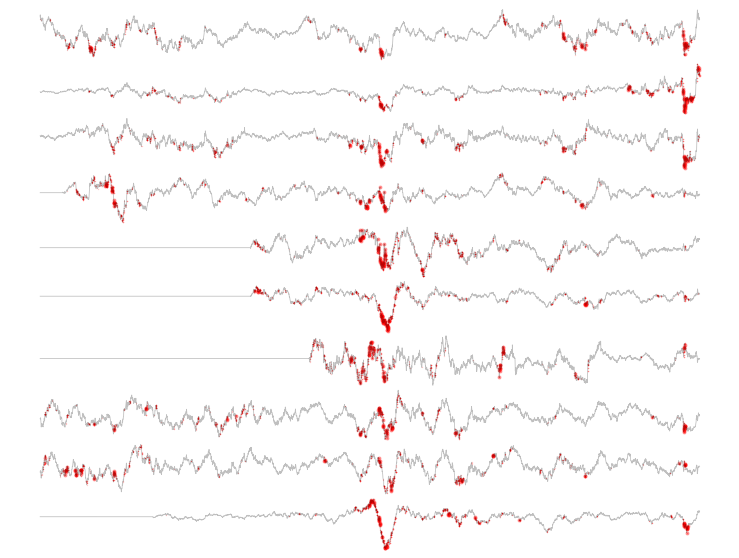

In [31]:
n = data.shape[1]

fig, ax = plt.subplots(n, 1, figsize=(13, 10))
for i in range(n):
    y = data.iloc[:,i].loc["1995":].diff().fillna(0).rolling("180d").mean().loc["1996":].fillna(0)
    sigma = data.iloc[:,i].loc["1995":].diff().fillna(0).rolling("10d").std().loc["1996":].fillna(0)
    for theta in [0.90, 0.95, 0.99]:
        ax[i].plot(y[sigma>sigma.quantile(theta)], linestyle="None", marker="o", ms=(0.01/(1-theta))*3, alpha=0.3, color="red")
    ax[i].plot(y, color="black", alpha=0.25)
    ax[i].axis("off")
    print(data.columns[i])

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("Ret.png",bbox_inches="tight")